In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Train_Data.csv')

In [3]:
df.shape

(1966, 9)

In [4]:
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [5]:
df.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

<Axes: >

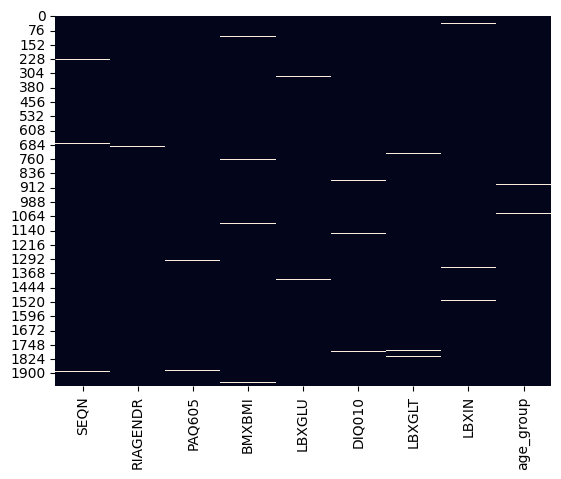

In [6]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

<Axes: xlabel='age_group', ylabel='count'>

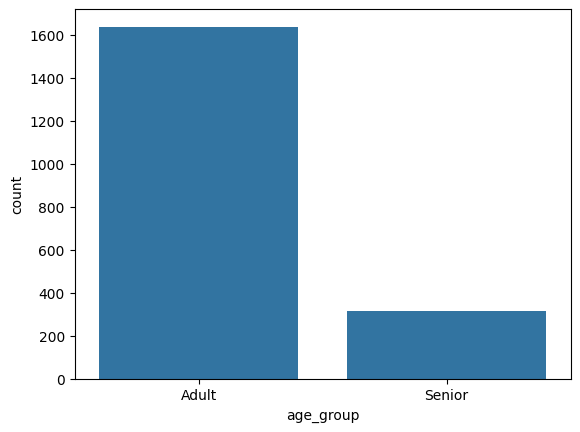

In [7]:
sns.countplot(x='age_group', data=df)

array([[<Axes: title={'center': 'SEQN'}>,
        <Axes: title={'center': 'RIAGENDR'}>,
        <Axes: title={'center': 'PAQ605'}>],
       [<Axes: title={'center': 'BMXBMI'}>,
        <Axes: title={'center': 'LBXGLU'}>,
        <Axes: title={'center': 'DIQ010'}>],
       [<Axes: title={'center': 'LBXGLT'}>,
        <Axes: title={'center': 'LBXIN'}>, <Axes: >]], dtype=object)

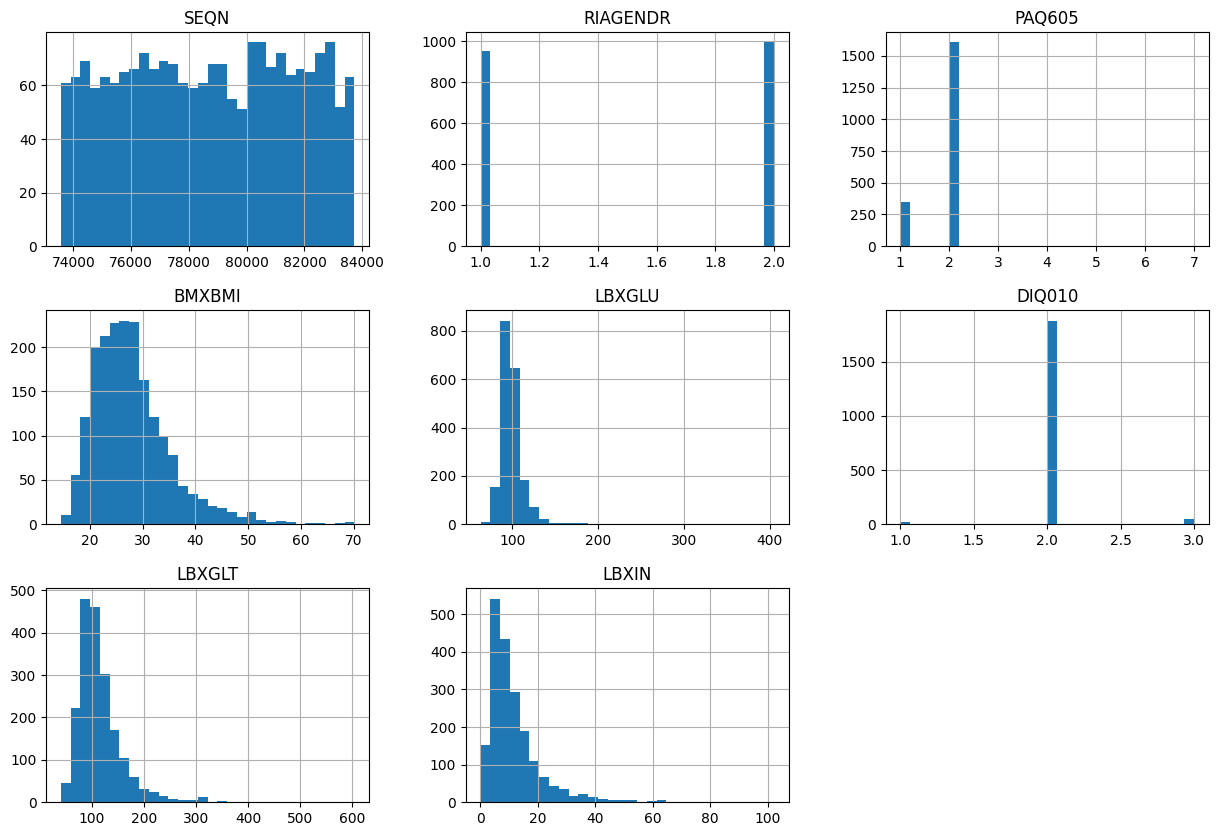

In [8]:
df.hist(bins=30, figsize=(15, 10))

In [9]:
df['RIAGENDR'].unique()

array([ 2.,  1., nan])

In [10]:
print(df['DIQ010'].unique())
# print(df['age_group'].isna().sum())      # counts real NaN only
print((df['age_group'] == 'nan').sum())  # counts literal strings 'nan'
print((df['RIAGENDR'] == 'nan').sum())  # counts literal strings 'nan'
print((df['PAQ605'] == 'nan').sum())  # counts literal strings 'nan'
print((df['BMXBMI'] == 'nan').sum())  # counts literal strings 'nan'
print((df['LBXGLU'] == 'nan').sum())  # counts literal strings 'nan'
print((df['DIQ010'] == 'nan').sum())  # counts literal strings 'nan'
print((df['LBXGLT'] == 'nan').sum())  # counts literal strings 'nan'
print((df['LBXIN'] == 'nan').sum())  # counts literal strings 'nan'

[ 2. nan  1.  3.]
0
0
0
0
0
0
0
0


In [11]:
df = df[df['PAQ605'] != 7.0]

In [12]:
le_map = {'Adult': 0, 'Senior': 1}
df['age_group'] = df['age_group'].map(le_map)

In [13]:
df['age_group'].isna().sum()

np.int64(14)

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SEQN' in num_cols: num_cols.remove('SEQN')

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNNImputer(n_neighbors=5, weights='distance'))
])

In [16]:
df_imputed_arr = pipe.fit_transform(df[num_cols])
df_imputed_num = pd.DataFrame(df_imputed_arr, columns=num_cols, index=df.index)

In [17]:
df_imputed_num['age_group'] = (
    df_imputed_num['age_group'].round().clip(0,1).fillna(df_imputed_num['age_group'].mode()[0]).astype(int)
)

In [18]:
print(df_imputed_num['age_group'].isna().sum())       # 0
print(df_imputed_num['age_group'].value_counts())

0
age_group
0    1649
1     316
Name: count, dtype: int64


In [19]:
df_imputed_num.isnull().sum()

RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64

In [20]:
print(df_imputed_num['RIAGENDR'].isna().sum())       # 0
print(df_imputed_num['RIAGENDR'].value_counts())
print(df_imputed_num['PAQ605'].isna().sum())       # 0
print(df_imputed_num['PAQ605'].value_counts())
print(df_imputed_num['BMXBMI'].isna().sum())       # 0
print(df_imputed_num['BMXBMI'].value_counts())
print(df_imputed_num['LBXGLU'].isna().sum())       # 0
print(df_imputed_num['LBXGLU'].value_counts())
print(df_imputed_num['DIQ010'].isna().sum())       # 0
print(df_imputed_num['DIQ010'].value_counts())
print(df_imputed_num['LBXGLT'].isna().sum())       # 0
print(df_imputed_num['LBXGLT'].value_counts())
print(df_imputed_num['LBXIN'].isna().sum())       # 0
print(df_imputed_num['LBXIN'].value_counts())

0
RIAGENDR
 0.979159    994
-1.021285    954
 0.188789      1
-0.742238      1
-0.292165      1
 0.116349      1
-0.719273      1
 0.979159      1
-0.023784      1
-0.397340      1
-0.272644      1
 0.165687      1
 0.232643      1
-0.250435      1
 0.650647      1
-0.329296      1
-1.021285      1
 0.576368      1
 0.532962      1
Name: count, dtype: int64
0
PAQ605
 0.464157    1609
-2.154442     346
-0.042570       1
-0.211577       1
-0.041581       1
 0.103019       1
-0.769092       1
 0.028929       1
-0.057924       1
 0.036043       1
 0.464157       1
-0.705271       1
Name: count, dtype: int64
0
BMXBMI
-0.555412    24
-0.582712    20
-0.077659    19
-0.023059    17
-0.910314    17
             ..
-1.551868     1
 0.987048     1
-0.012177     1
 2.188255     1
 1.117598     1
Name: count, Length: 350, dtype: int64
0
LBXGLU
-0.207814    107
-0.327053    102
-0.028955     92
 0.030665     85
-0.267433     83
            ... 
 1.938496      1
-0.175744      1
 3.488608      1
-0.

In [21]:
print(df['RIAGENDR'].isna().sum())       # 0
print(df['RIAGENDR'].value_counts())
print(df['PAQ605'].isna().sum())       # 0
print(df['PAQ605'].value_counts())
print(df['DIQ010'].isna().sum())       # 0
print(df['DIQ010'].value_counts())


18
RIAGENDR
2.0    994
1.0    953
Name: count, dtype: int64
13
PAQ605
2.0    1606
1.0     346
Name: count, dtype: int64
18
DIQ010
2.0    1878
3.0      50
1.0      19
Name: count, dtype: int64


In [22]:
df[df['PAQ605']==7.0]

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group


In [23]:
df_data = pd.read_csv('Test_Data.csv')

In [24]:
print(df_data['RIAGENDR'].isna().sum())       # 0
print(df_data['RIAGENDR'].unique())
print(df_data['PAQ605'].isna().sum())       # 0
print(df_data['PAQ605'].unique())
print(df_data['DIQ010'].isna().sum())       # 0
print(df_data['DIQ010'].unique())

2
[ 1.  2. nan]
1
[ 1.  2. nan]
1
[ 2.  1. nan  3.]


In [25]:
df_data[df_data['DIQ010']==3.0]

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
89,75339.0,1.0,1.0,37.0,103.0,3.0,182.0,8.18
117,80112.0,1.0,1.0,28.7,110.0,3.0,157.0,21.33
124,76411.0,2.0,1.0,31.2,104.0,3.0,116.0,15.59
153,76915.0,1.0,1.0,31.6,99.0,3.0,154.0,29.88
161,80539.0,1.0,2.0,31.4,368.0,3.0,503.0,13.07
231,80772.0,1.0,2.0,22.4,116.0,3.0,110.0,12.00
277,82503.0,2.0,2.0,25.8,91.0,3.0,110.0,17.29


In [26]:
import numpy as np

# Define the allowed codes for each column
allowed_codes = {
    'RIAGENDR': np.array([1, 2]),
    'PAQ605'  : np.array([1, 2]),
    'DIQ010'  : np.array([1, 2, 3])
}

# Function to map any value to the closest allowed code
def snap_to_codes(series, codes):
    # For vectorised speed: take absolute diff to each code, pick argmin
    idx = np.abs(series.values.reshape(-1, 1) - codes).argmin(axis=1)
    return pd.Series(codes[idx], index=series.index, dtype='int64')

# Apply the correction
for col, codes in allowed_codes.items():
    df_imputed_num[col] = snap_to_codes(df_imputed_num[col], codes)

# Quick sanity-check
for col in allowed_codes:
    print(col, df_imputed_num[col].unique())

RIAGENDR [1]
PAQ605 [1]
DIQ010 [1 3 2]


In [27]:
for col, codes in allowed_codes.items():
    df_imputed_num[col] = snap_to_codes(df_imputed_num[col], codes).astype(float)

In [28]:
print(df_imputed_num['RIAGENDR'].isna().sum())       # 0
print(df_imputed_num['RIAGENDR'].unique())
print(df_imputed_num['PAQ605'].isna().sum())       # 0
print(df_imputed_num['PAQ605'].unique())
print(df_imputed_num['DIQ010'].isna().sum())       # 0
print(df_imputed_num['DIQ010'].unique())

0
[1.]
0
[1.]
0
[1. 3. 2.]


In [29]:
df_imputed_num.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,1.0,1.0,1.055298,0.626862,1.0,0.752827,0.311958,0
1,1.0,1.0,-1.046815,-0.625152,1.0,-0.760417,-0.821797,0
2,1.0,1.0,-0.650962,-0.625152,1.0,-1.019830,-0.587051,0
3,1.0,1.0,0.127092,0.269144,1.0,-0.673946,0.439070,0
4,1.0,1.0,1.082598,0.209524,1.0,-0.738799,-0.097055,0


In [30]:
df.isnull().sum()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [31]:
scaler = pipe.named_steps['scale']

df_unscaled_arr = scaler.inverse_transform(df_imputed_arr)

df_unscaled = pd.DataFrame(
    df_unscaled_arr,
    columns=num_cols,
    index=df.index
)
for col, codes in allowed_codes.items():
    df_unscaled[col] = snap_to_codes(df_unscaled[col], codes).astype(float)

df_unscaled['age_group'] = (
    df_unscaled['age_group']
      .round().clip(0, 1)                  # keep only 0 or 1
      .fillna(df_unscaled['age_group'].mode()[0])
      .astype(int)
)

In [32]:
df_unscaled.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0


In [33]:
df_unscaled.isnull().sum()

RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64

In [ ]:
df_train = df_unscaled.copy()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [36]:
X = df_train.drop(columns=['age_group'])
y = df_train['age_group']

In [37]:
plot_data(df_train,'BMXBMI')

NameError: name 'plot_data' is not defined

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
# models = {
#     "LogisticRegression": LogisticRegression(max_iter=1000),
#     "RandomForest": RandomForestClassifier(),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# }

# for name, model in models.items():
#     pipe = Pipeline([
#         ('scaler', StandardScaler()),  # Optional for tree models, helpful for LR
#         ('clf', model)
#     ])
    
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
#     score = f1_score(y_test, y_pred, average='macro')
#     print(f"{name}: F1_macro = {score:.4f}")


LogisticRegression: F1_macro = 0.4825
RandomForest: F1_macro = 0.5484
XGBoost: F1_macro = 0.6013


c:\Users\Dell\OneDrive\jbooks\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:24:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# print(y.value_counts(), '\n')
# print('Minority ratio (Senior):', (y == 1).mean().round(3))

age_group
0    1649
1     316
Name: count, dtype: int64 

Minority ratio (Senior): 0.161


In [ ]:
# from xgboost import XGBClassifier

# scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()  # ~1600 / 300 ≈ 5.33

# model = XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss')

In [ ]:
# model.score(X_train,y_train)

0.839058524173028

In [ ]:
# from sklearn.metrics import classification_report
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       330
           1       0.42      0.24      0.30        63

    accuracy                           0.82       393
   macro avg       0.64      0.59      0.60       393
weighted avg       0.79      0.82      0.80       393



c:\Users\Dell\OneDrive\jbooks\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:25:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,C=0.01,solver='lbfgs')

# lr.fit(X_train, y_train)

# y_pred = lr.predict(X_test)

# print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.907     0.767     0.831       330
           1      0.325     0.587     0.418        63

    accuracy                          0.738       393
   macro avg      0.616     0.677     0.624       393
weighted avg      0.813     0.738     0.765       393



In [ ]:
# y_ontest = model.predict(df_test)

In [38]:
import scipy.stats as stat
import pylab 
df_unscaled['BMXBMI'],parameters=stat.boxcox(df_unscaled['BMXBMI'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees
    'max_depth': [None, 10, 20, 30],     # Tree depth
    'min_samples_split': [2, 5, 10],     # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],       # Min samples at a leaf node
    'bootstrap': [True, False]           # Whether bootstrap samples are used
}

# Initialize the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid search setup
grid = GridSearchCV(
    rf_model,
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,  # Use all CPU cores
    verbose=2
)

# Fit on training data
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


from sklearn.metrics import classification_report

# Predict using the best estimator
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    
}
grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000),
                    param_grid, scoring='f1_macro', cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Params: {'C': 0.01}
Best F1 Score: 0.6299026149693475


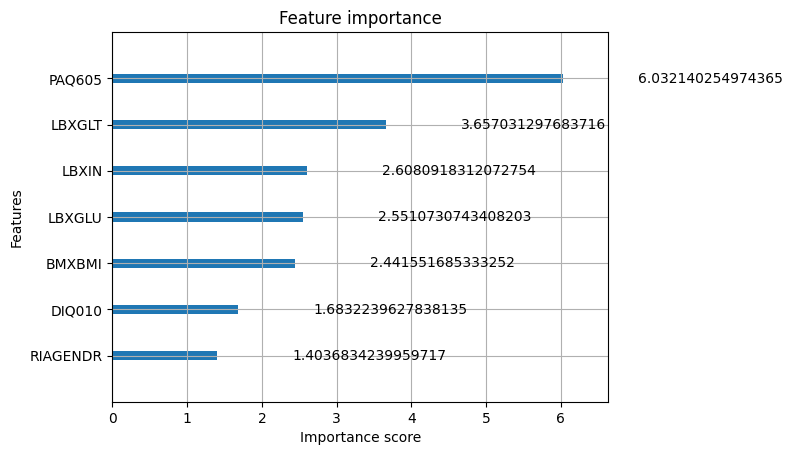

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, importance_type='gain')
plt.show()


In [ ]:
from xgboost import XGBClassifier

# Calculate class weights manually
from collections import Counter
counter = Counter(y_train)
majority = counter[0]
minority = counter[1]
scale_pos_weight = majority / minority

# Pass it to the model
model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

c:\Users\Dell\OneDrive\jbooks\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import scipy.stats as stat
import pylab 
df_unscaled['BMXBMI'],parameters=stat.boxcox(df_unscaled['BMXBMI'])

In [ ]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

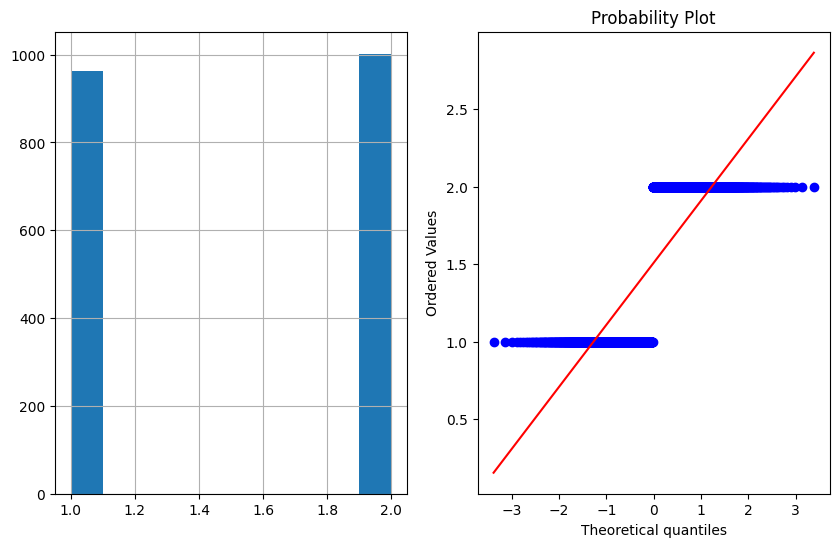

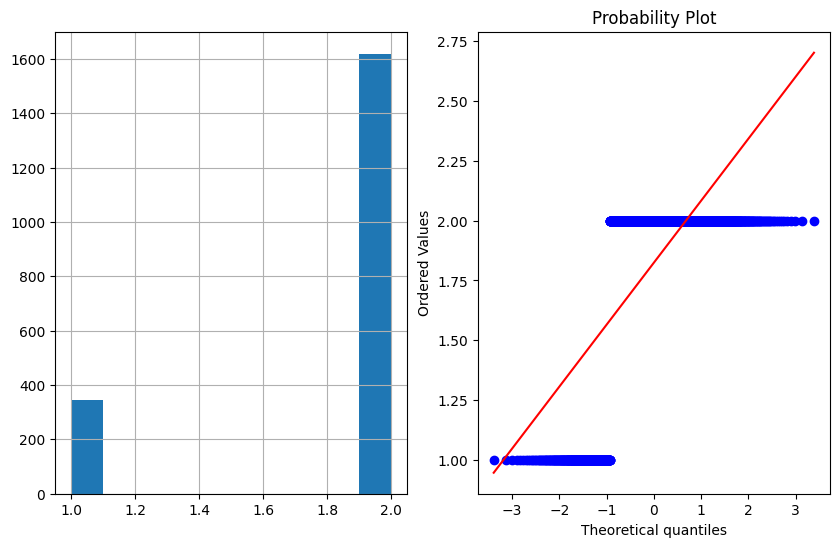

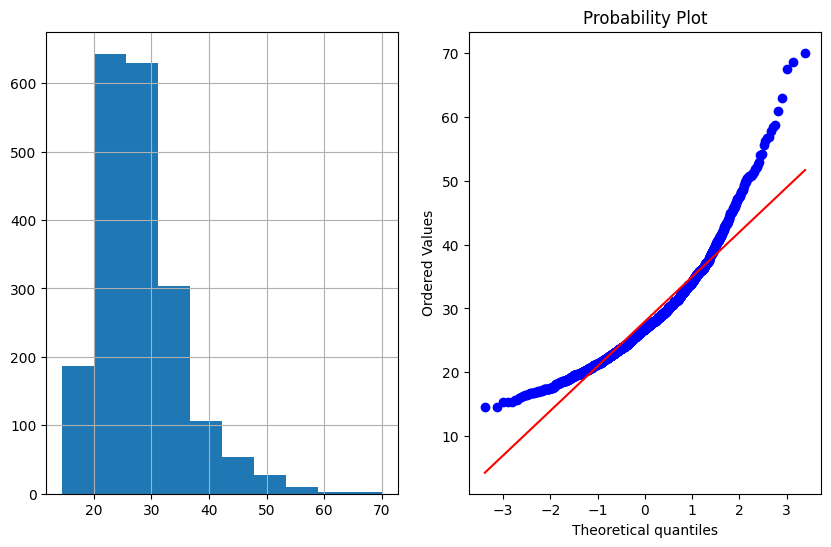

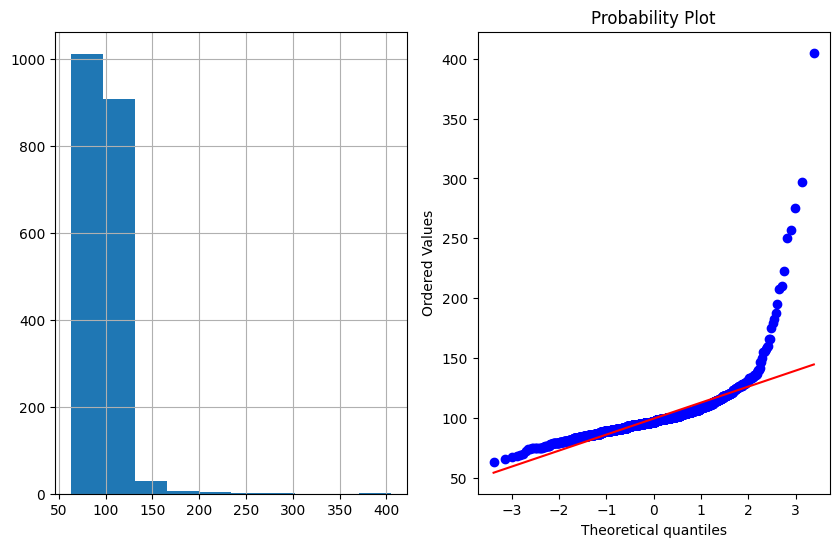

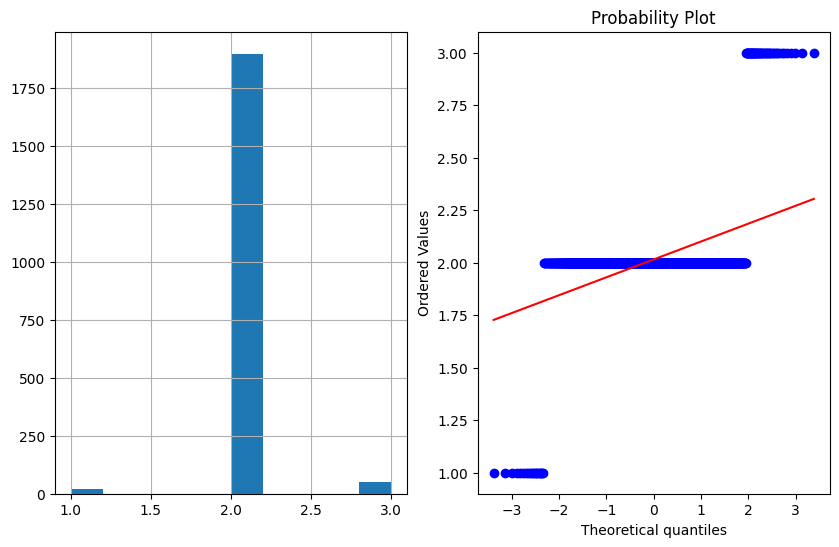

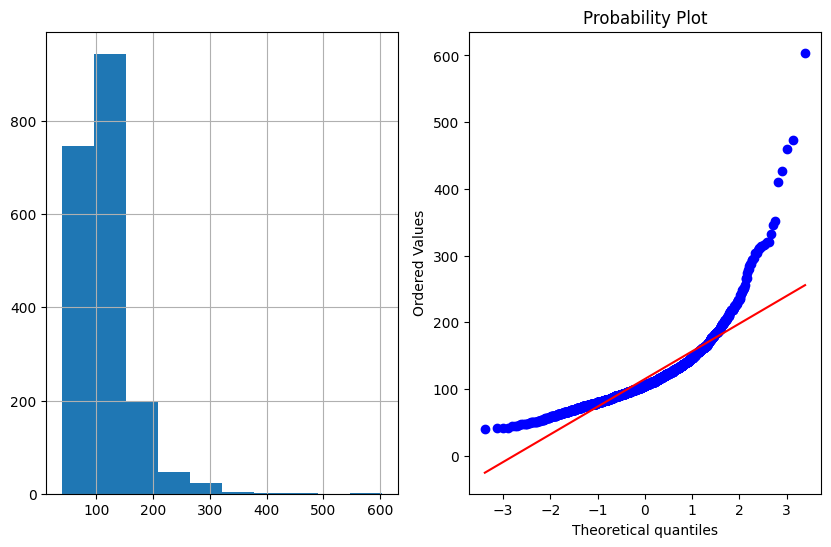

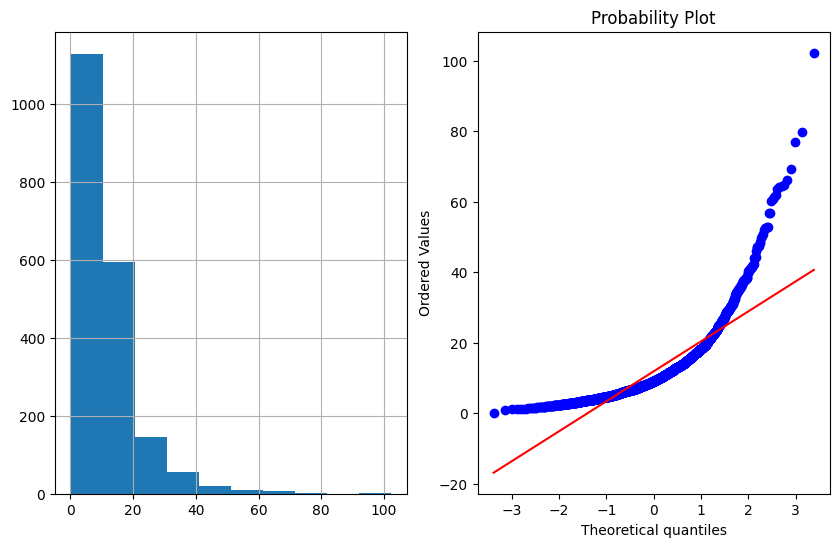

In [ ]:
plot_data(df_train,'RIAGENDR');
plot_data(df_train,'PAQ605');
plot_data(df_train,'BMXBMI');
plot_data(df_train,'LBXGLU');
plot_data(df_train,'DIQ010');
plot_data(df_train,'LBXGLT');
plot_data(df_train,'LBXIN');

In [ ]:
df_unscaled['BMXBMI'] = np.log1p(df_unscaled['BMXBMI'])

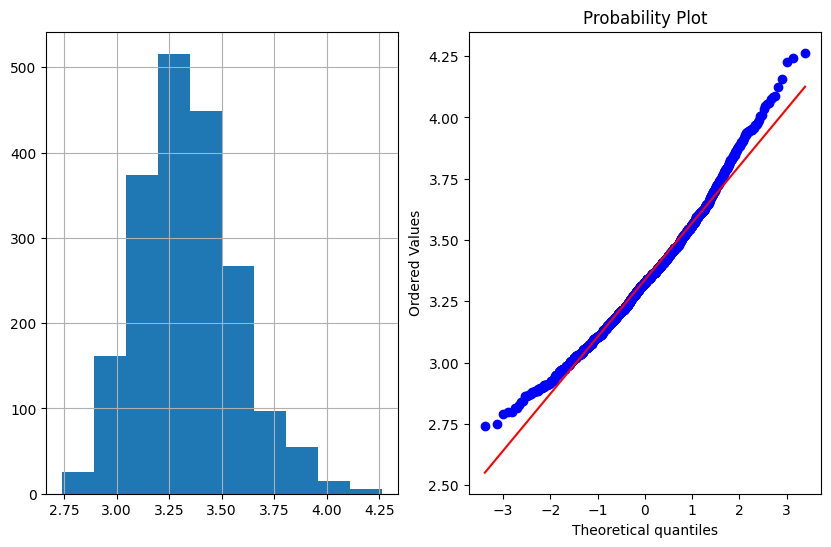

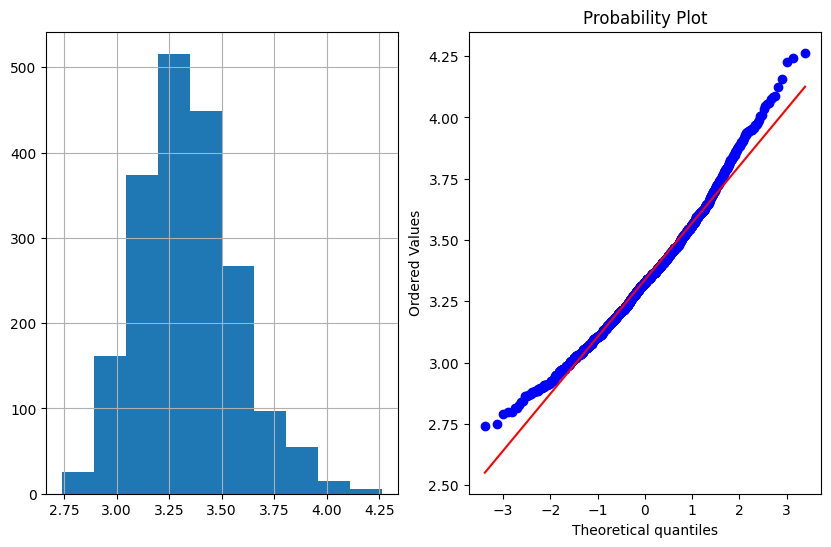

In [ ]:
plot_data(df_train,'BMXBMI');
plot_data(df_unscaled,'BMXBMI');

In [ ]:
#### Exponential Transdormation
df_unscaled['BMXBMI']=df_unscaled.BMXBMI**(1/1.2)

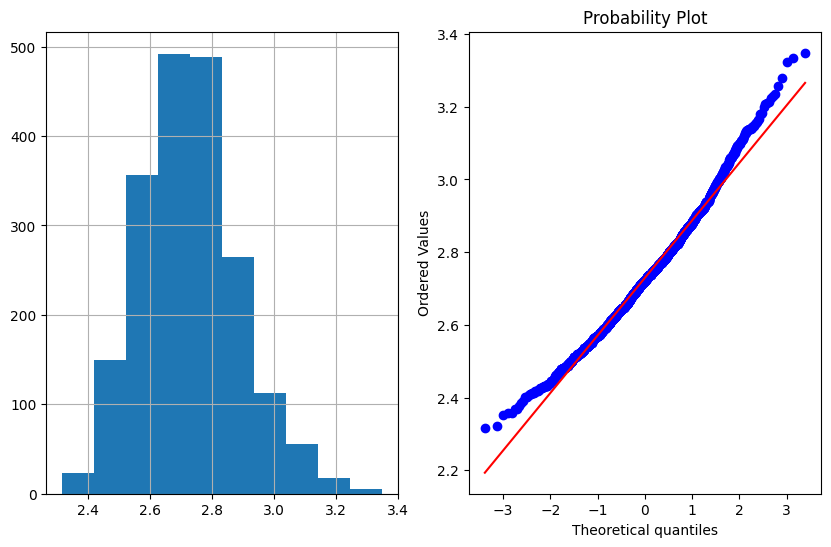

In [ ]:
plot_data(df_train,'BMXBMI');

In [ ]:
df_unscaled['BMXBMI'],parameters=stat.boxcox(df_unscaled['BMXBMI'])

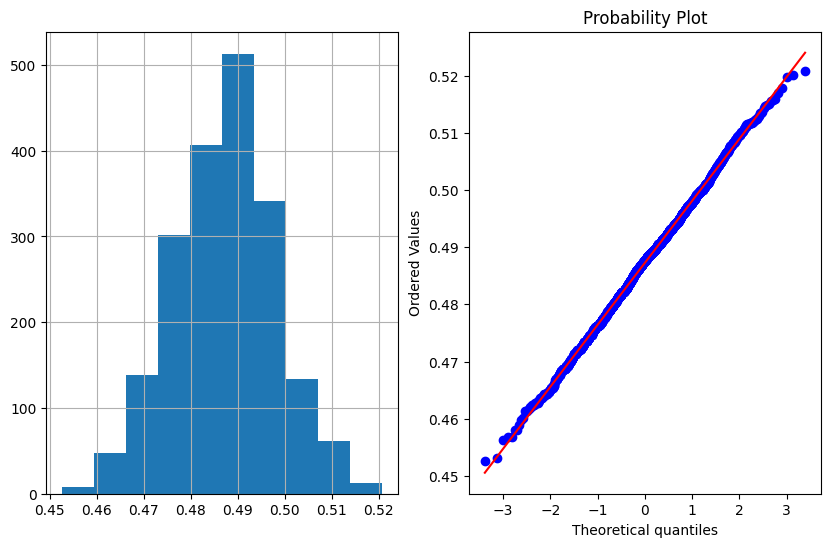

In [ ]:
plot_data(df_train,'BMXBMI');

In [ ]:
# df_unscaled['LBXGLU'],parameters=stat.boxcox(df_unscaled['LBXGLU'])
# # df_unscaled['LBXGLU']=df_unscaled.LBXGLU**(1/1.2)
# # df_unscaled['LBXGLU']=np.log1p(df_unscaled['LBXGLU'])
# # df_unscaled['LBXGLU']=df_unscaled.LBXGLU**(1/2)
# # df['LBXGLU']=1/
# plot_data(df_train,'LBXGLU');

In [ ]:
model.score(X_train,y_train)

0.9510178117048346

In [ ]:
model.score(X_test,y_test)

0.9516539440203562

In [ ]:
model.fit(X_train,y_train)

c:\Users\Dell\OneDrive\jbooks\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:26:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Dell\\OneDrive\\jbooks\\venv\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Dell\\OneDrive\\jbooks\\venv\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       330
           1       0.42      0.24      0.30        63

    accuracy                           0.82       393
   macro avg       0.64      0.59      0.60       393
weighted avg       0.79      0.82      0.80       393



In [ ]:
df_test = pd.read_csv('Test_Data.csv')

In [ ]:
df_test.drop(columns = ['SEQN'], inplace=True)

In [ ]:
df_test.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [ ]:
df_train.head()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,0.499541,110.0,2.0,150.0,14.91,0
1,2.0,2.0,0.473617,89.0,2.0,80.0,3.85,0
2,1.0,2.0,0.480652,89.0,2.0,68.0,6.14,0
3,1.0,2.0,0.490936,104.0,2.0,84.0,16.15,0
4,2.0,1.0,0.499753,103.0,2.0,81.0,10.92,0


In [ ]:
X

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,2.0,2.0,0.499541,110.000000,2.0,150.0,14.91
1,2.0,2.0,0.473617,89.000000,2.0,80.0,3.85
2,1.0,2.0,0.480652,89.000000,2.0,68.0,6.14
3,1.0,2.0,0.490936,104.000000,2.0,84.0,16.15
4,2.0,1.0,0.499753,103.000000,2.0,81.0,10.92
...,...,...,...,...,...,...,...
1961,2.0,2.0,0.497070,100.000000,2.0,73.0,6.53
1962,1.0,2.0,0.492542,93.000000,2.0,208.0,13.02
1963,1.0,2.0,0.481717,103.000000,2.0,124.0,21.41
1964,2.0,2.0,0.488576,90.000000,2.0,108.0,4.99


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1961    0
1962    0
1963    0
1964    0
1965    0
Name: age_group, Length: 1965, dtype: int64

In [ ]:
y_ontest = model.predict(df_test)

In [ ]:
y_ontest

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result = pd.DataFrame({'age_group': y_ontest})

In [ ]:
result.to_csv("week4Hackathon1.csv", index=False)